# Data Case 

## Gotta Catch'em All!


We will investigate important managerial questions concerning one of the most critical entities in modern civilization: <b>Pokemon</b>.

The columns of the data are as follows:
- <i>pokedex</i>: Pokemon ID in the national Pokedex
- <i>name</i>: name of the Pokemon
- <i>generation</i>: number of the first generation that the Pokemon appeared
- <i>status</i>: if the Pokemon is Normal, Legendary, Sub Legendary, or Mythical
- <i>type_1, type_2</i>: types of the the Pokemon (some have only one type)
- <i>height_m</i>: height in metters
- <i>weight_kg</i>: weight in kilograms
- <i>ability_1, ability_2</i>: Pokemon abilities (some have only one ability)
- <i>attack:</i> The base attack of the Pokemon (large is better)
- <i>defense:</i> The base defense of the Pokemon (large is better)
- <i>speed:</i> The base speed of the Pokemon (large is better)
- <i>catch_rate</i>: The catch rate of the Pokemon. It is a number between 3 and 255

Answer the questions below using Python in the appropriate cells. Even if the question does not ask explicitely, recall to <b>check the consistency and clean the data, if needed,</b> before your analysis in each case. Add qualitative answers as comments in the cells.

<b> Note: </b> Before answering the questions, please go to to the Jupyter's menu and execute "Kernel," "Restart & Run all." This will ensure that the notebook and modules are appropriately loaded.

## Reading Data

Load the file in a data frame <i>dfPokemon</i>. Make sure to understand all columns before proceeding with the questions

In [1]:
# Import Python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Disable warnings to facilitate the analysis (SetttingwithCopyWarning)
pd.set_option('mode.chained_assignment', None)

In [2]:
dfPokemon = pd.read_csv('pokedex.csv', header=0, index_col=0)
dfPokemon.head(5)

,name,generation,status,type_1,type_2,height_m,weight_kg,ability_1,ability_2,hp,attack,defense,speed,catch_rate
pokedex,,,,,,,,,,,,,,
1,Bulbasaur,1,Normal,Grass,Poison,0.7,6.9,Overgrow,NaN,45,49,49,45,45.0
2,Ivysaur,1,Normal,Grass,Poison,1.0,13.0,Overgrow,NaN,60,62,63,60,45.0
3,Venusaur,1,Normal,Grass,Poison,2.0,100.0,Overgrow,NaN,80,82,83,80,45.0
3,Mega Venusaur,1,Normal,Grass,Poison,2.4,155.5,Thick Fat,NaN,80,100,123,80,45.0
4,Charmander,1,Normal,Fire,NaN,0.6,8.5,Blaze,NaN,39,52,43,65,45.0


## Question 1

Often managers would like to have legendary Pokemon in their teams. It is assumed, however, that they are quite difficult to find and many spend months to catch them all. 

Is that really true? That is, are legendary Pokemon really rare <i>and</i> difficult to catch?  [2 pts]

For this question, I will consider that

- A Pokemon type is <i>rare</i> if there are not many of the same type in the dataset
- A Pokemon is <i>difficult to catch</i> if its catch rate is smaller than others in the dataset.

In [3]:
# Obtain legendary and non-legendary Pokemon
dfLegendary = dfPokemon[ dfPokemon["status"] == "Legendary" ]
dfNonLegendary = dfPokemon[ dfPokemon["status"] != "Legendary" ]

In [4]:
# Calculate rarity - here porcentage of rare Pokemon across total
percentage = 100 * dfLegendary.shape[0] / dfPokemon.shape[0]
print( str(round(percentage, 2)) + "%" )

3.79%


Legendary Pokemon are only 3.79%, so they are indeed rare! 

Now let us compare quantities in both of catch_rate. First, we need to check if the column <i>catch_rate</i> is consistent.

In [5]:
# First the type
dfPokemon.dtypes

name           object
generation      int64
status         object
type_1         object
type_2         object
height_m      float64
weight_kg     float64
ability_1      object
ability_2      object
hp              int64
attack         object
defense        object
speed           int64
catch_rate    float64
dtype: object

In [6]:
# Now the NaN
print( "Legendary NaN: " + str(dfLegendary["catch_rate"].isnull().sum()) )
print( "Non-legendary NaN: " + str(dfNonLegendary["catch_rate"].isnull().sum()) )

Legendary NaN: 6
Non-legendary NaN: 98


Both columns have NaN. What can we do now? Two options:

- <i>Do nothing/drop the NaN</i>. They are in small numbers so we could potentially drop them. We just need to be careful to check and report how we are adding bias in this case. For this dataset, if we do any further analysis (which is required if we drop them), all the Legendary Pokemon who are missing come from generation 8. Thus, we must indicate that our insights may not be valid for generation 8, and discuss how that impact the generality of our conclusions (e.g., likely not much in this case, since we are just missing one generation).


- <i>Filling data.</i> The most important aspect here is to think of what replacement value would make the most sense. The "ideal" solution, not practical in this case, is just to search online for those Pokemon. Otherwise, we need to consider the consequence or interpretation of our analysis once we replace those values. 

For this question, I will do a <i>conservative analysis</i> and fill the legendary with "255" and the non-legendary with "3," i.e., with both extremes. With those values, I will know that the <b>real</b> legendary catch rate mean is <i>at most</i> the value I obtain, and the non-legendary real mean will be <i>at least</i> the value I get. Similarly for the standard deviations. Thus, if even with those replacements I deduce that the legendary catch rate is smaller than the non-legendary one, I can safely infer that indeed they are more difficult to catch.

In [7]:
# Fill the legendary with 255
dfLegendaryClean = dfLegendary.fillna({"catch_rate":255})
dfLegendaryClean["catch_rate"].isnull().sum()

0

In [8]:
# Fill the non-legendary with 3
dfNonLegendaryClean = dfNonLegendary.fillna({"catch_rate":3})
dfNonLegendaryClean["catch_rate"].isnull().sum()

0

In [9]:
# Now let us compare the distributions
print("Legendary: ")
print( dfLegendaryClean["catch_rate"].describe() )

print("\nNon-legendary: ")
print( dfNonLegendaryClean["catch_rate"].describe() )

Legendary: 
count     39.000000
mean      55.871795
std       95.677963
min        3.000000
25%        3.000000
50%        3.000000
75%       45.000000
max      255.000000
Name: catch_rate, dtype: float64

Non-legendary: 
count    989.000000
mean      86.689585
std       76.191797
min        3.000000
25%       45.000000
50%       45.000000
75%      120.000000
max      255.000000
Name: catch_rate, dtype: float64


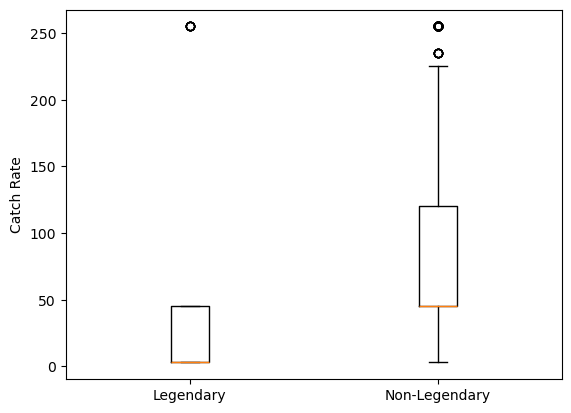

In [10]:
# A box plot would be really helpful too
data = [dfLegendaryClean["catch_rate"], dfNonLegendaryClean["catch_rate"]]
plt.boxplot(data, labels=["Legendary","Non-Legendary"])
plt.ylabel("Catch Rate")
plt.show()

Even replacing with extremes, the legendary catch rate is <b>significantly smaller</b> than the non-legendary ones. Notice that the mean is small, and the standard deviation of the legendary is higher simply because of the 255 points we added, which are outliers in its distributions. So yes, they are certainly harder to catch.

## Question 2

A manager wishes to build the best Pokemon team possible. Who is the strongest Pokemon in terms of <b>attack</b> in the lastest generation in the dataset? And the one with the best <b>defense</b>? [1 pt]

We start by taking the subset of the data that we need and cleaning it.

In [11]:
# Pick last generation
dfLastGeneration = dfPokemon[ dfPokemon["generation"] == dfPokemon["generation"].max() ]
dfLastGeneration.head(5)

,name,generation,status,type_1,type_2,height_m,weight_kg,ability_1,ability_2,hp,attack,defense,speed,catch_rate
pokedex,,,,,,,,,,,,,,
810,Grookey,8,Normal,Grass,NaN,0.3,5.0,Overgrow,NaN,50,65,50,65,NaN
811,Thwackey,8,Normal,Grass,NaN,0.7,14.0,Overgrow,NaN,70,85,70,80,NaN
812,Rillaboom,8,Normal,Grass,NaN,2.1,90.0,Overgrow,NaN,100,125,90,85,NaN
813,Scorbunny,8,Normal,Fire,NaN,0.3,4.5,Blaze,NaN,50,71,40,69,NaN
814,Raboot,8,Normal,Fire,NaN,0.6,9.0,Blaze,NaN,65,86,60,94,NaN


In [12]:
# Let us check the object types
dfLastGeneration[["attack","defense"]].dtypes

attack     object
defense    object
dtype: object

In [13]:
# Both are objects and may contain strings! Let's investigate:

def is_number(x):
    try:
        float(x)
    except ValueError:
        return False
    else:
        return True

dfLastGeneration[ ~(dfLastGeneration["attack"].apply(is_number)) | ~(dfLastGeneration["defense"].apply(is_number)) ]

,name,generation,status,type_1,type_2,height_m,weight_kg,ability_1,ability_2,hp,attack,defense,speed,catch_rate
pokedex,,,,,,,,,,,,,,


There are no strings in either column. This is because there must be strings in the full dataset (i.e., in other previous generations), so Python set this column as an object. However, we do not need to worry with that in this question. 

We can simply transform both columns into numbers

In [14]:
dfLastGeneration["attack"] = pd.to_numeric(dfLastGeneration["attack"], errors="coerce")
dfLastGeneration["defense"] = pd.to_numeric(dfLastGeneration["defense"], errors="coerce")

# Check types again and missing fields
print( dfLastGeneration[["attack","defense"]].dtypes )

dfLastGeneration[["attack","defense"]].isnull().sum()

attack     int64
defense    int64
dtype: object


attack     0
defense    0
dtype: int64

Do not worry if we receive a <i>SettingWithCopyWarning</i> warning in the cell above, it indicates that we are changing a column on a slice and <i>not</i> on the original dataframe.

Finally, we pick the Pokemon having the best attack and the best defense. Notice that it can be more than one, in case they have the same attack.

In [15]:
dfLastGeneration[ dfLastGeneration["attack"] == dfLastGeneration["attack"].max() ]

,name,generation,status,type_1,type_2,height_m,weight_kg,ability_1,ability_2,hp,attack,defense,speed,catch_rate
pokedex,,,,,,,,,,,,,,
888,Zacian Crowned Sword,8,Legendary,Fairy,Steel,2.8,355.0,Intrepid Sword,NaN,92,170,115,148,NaN


In [16]:
dfLastGeneration[ dfLastGeneration["defense"] == dfLastGeneration["defense"].max() ]

,name,generation,status,type_1,type_2,height_m,weight_kg,ability_1,ability_2,hp,attack,defense,speed,catch_rate
pokedex,,,,,,,,,,,,,,
890,Eternatus Eternamax,8,Legendary,Poison,Dragon,100.0,NaN,NaN,NaN,255,115,250,130,NaN


## Question 3

List the top three generations with the highest mean defense. 

Is the defense distribution significantly different among these three generations? Use appropriate plots to better justify your answer. [1 pt]

We saw in Q2 that the "defense" column is an object, which is an indication that it may have strings. Let us check those strings and clean it.

In [17]:
# Both are object / may contain strings! Let's investigate

def is_number(x):
    try:
        float(x)
    except ValueError:
        return False
    else:
        return True

dfPokemon[ ~(dfPokemon["defense"].apply(is_number)) ]

,name,generation,status,type_1,type_2,height_m,weight_kg,ability_1,ability_2,hp,attack,defense,speed,catch_rate
pokedex,,,,,,,,,,,,,,
500,Emboar,5,Normal,Fire,Fighting,1.6,150.0,Blaze,NaN,110,123,Error Export,65,45.0


There is an "Error Export" - only one! We now clean it and check the NaN

In [18]:
# Fix the string issue
dfPokemon["defense"] = pd.to_numeric(dfPokemon["defense"], errors="coerce")

# Check the NaN
dfPokemon["defense"].isnull().sum()

1

In [19]:
# Only one: we can drop it!
dfPokemonClean = dfPokemon.dropna(axis=0, subset=["defense"])
dfPokemonClean["defense"].isnull().sum()

0

In [20]:
# Finally, let's calculate the top-three generations with the highest mean

# Get a data frame with the mean defenses by grouping
dfDefense = dfPokemonClean.groupby("generation")[["defense"]].mean()

# Obtain top-three
dfTopThree = dfDefense.sort_values(by="defense", ascending=False).head(3)
dfTopThree

,defense
generation,
7,79.202020
4,78.132231
6,77.023529


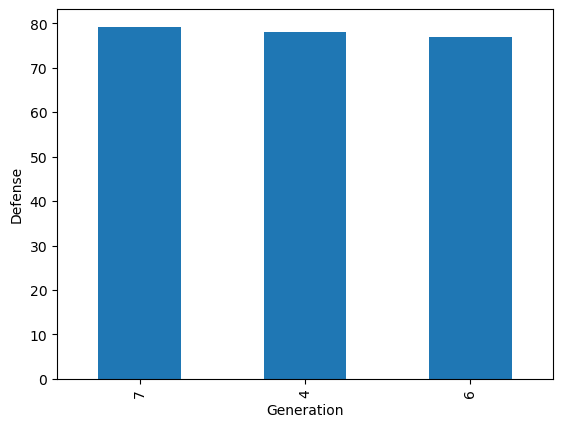

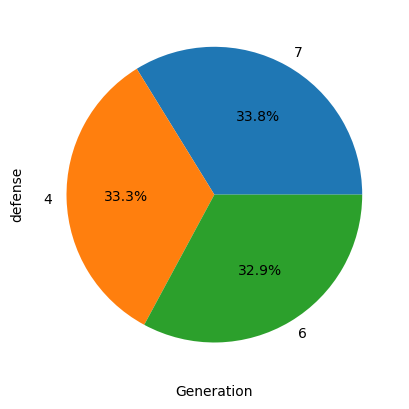

In [21]:
# Let's do a bar chart and pie chart to best visualize them
dfTopThree["defense"].plot.bar()
plt.xlabel("Generation")
plt.ylabel("Defense")
plt.show()

dfTopThree["defense"].plot.pie(autopct="%.1f%%")
plt.xlabel("Generation")
plt.show()

The highest-defense generations are 7, 4, and 6 (in order). However, they are very similar with respect to their means. We can also create a boxplot to better compare their distributions.

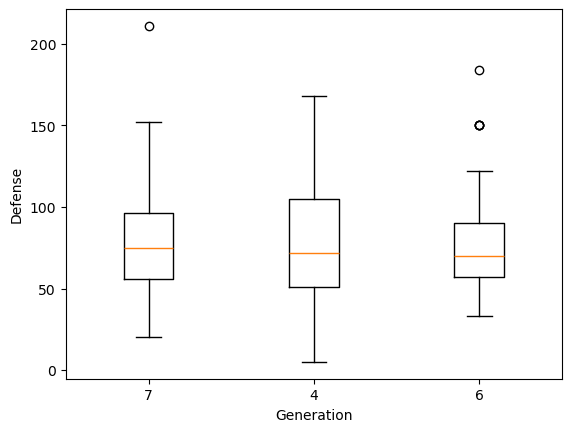

In [22]:
# A box plot would be really helpful too
topgenerations = dfTopThree.index
data = []
for generation in topgenerations:
    data.append(dfPokemonClean[dfPokemonClean["generation"] == generation]["defense"])
plt.boxplot(data, labels=topgenerations)
plt.ylabel("Defense")
plt.xlabel("Generation")
plt.show()

All top-three generations are somewhat similar in their defense, except that generation 4 has a somewhat wider distribution/larger standard deviation.

## Question 4

Do Pokemon of two types have better attack rates than the ones that have only one type? [2 pts]

Use appropriate plots to justify your answer. 

Similar to Q2 and Q3, we start by cleaning the ''attack'' column.

In [23]:
# Check the rows with strings
dfPokemon[~(dfPokemon["attack"].apply(is_number))]

,name,generation,status,type_1,type_2,height_m,weight_kg,ability_1,ability_2,hp,attack,defense,speed,catch_rate
pokedex,,,,,,,,,,,,,,
215,Sneasel,2,Normal,Dark,Ice,0.9,28.0,Inner Focus,Keen Eye,55,Error export,55.0,115,60.0


In [24]:
# Only one numeric - we now clean it
dfPokemon["attack"] = pd.to_numeric(dfPokemon["attack"], errors="coerce")

# Check NaNs
dfPokemon["attack"].isnull().sum()

1

In [25]:
# Only one added by the attack fix. We drop it
dfPokemonClean = dfPokemon.dropna(axis=0, subset=["attack"])
dfPokemonClean["attack"].isnull().sum()

0

In [26]:
# Now we check type_1
print("Type 1 NaN: " + str(dfPokemonClean["type_1"].isnull().sum()))

Type 1 NaN: 0


In [27]:
# We now collect the one and two-type Pokemon. 
# A Pokemon has two types if both type_1 and type_2 are not NaN

dfType1 = dfPokemonClean[   dfPokemonClean["type_2"].isnull()  ]
dfType2 = dfPokemonClean[ ~(dfPokemonClean["type_2"].isnull()) ]

In [28]:
# Let's compare the distribution of the attacks

print("Type 1: ")
print( dfType1["attack"].describe() )

print("\nType 2: ")
print( dfType2["attack"].describe() )

Type 1: 
count    486.000000
mean      75.415638
std       30.766297
min        5.000000
25%       53.000000
50%       71.000000
75%       95.000000
max      180.000000
Name: attack, dtype: float64

Type 2: 
count    541.00000
mean      84.31793
std       33.24063
min       10.00000
25%       60.00000
50%       81.00000
75%      105.00000
max      190.00000
Name: attack, dtype: float64


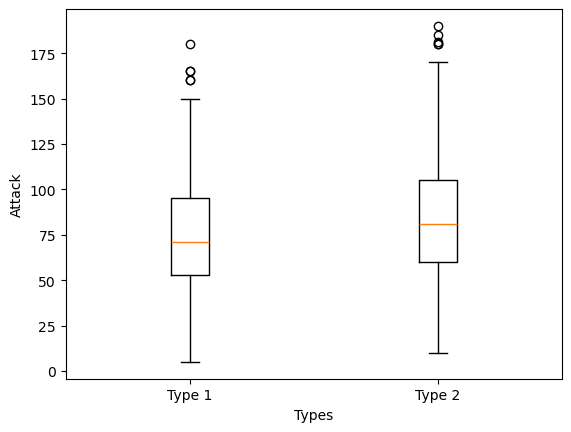

In [29]:
# We can also use box plots to compare their distributions
data = [ dfType1["attack"], dfType2["attack"] ]
plt.boxplot(data, labels=["Type 1", "Type 2"])
plt.xlabel("Types")
plt.ylabel("Attack")
plt.show()

Type 2 are slightly stronger than Type 1, with larger mean (84 vs. 75) and comparable standard deviation (~ 33).

## Question 5

In a Pokemon conference meeting, one attendee mentioned that Pokemon who have a higher weight also are slower. Albeit intuitive, another attendee mentioned that it was just a myth, as weight did not really impact Pokemon speed. 

Who is right? Use data to provide strong evidence for one side or the other. [2 pts]

Here we want to calculate the correlation between weight and speed. Let's start analyzing each column separately to understand them better, and then perform the correlation analysis.

<i>Data Cleaning</i>

In [30]:
dfPokemon[ dfPokemon["weight_kg"].isnull() ]

,name,generation,status,type_1,type_2,height_m,weight_kg,ability_1,ability_2,hp,attack,defense,speed,catch_rate
pokedex,,,,,,,,,,,,,,
890,Eternatus Eternamax,8,Legendary,Poison,Dragon,100.0,NaN,NaN,NaN,255,115.0,250.0,130,NaN


In [31]:
dfPokemon[ dfPokemon["speed"].isnull() ]

,name,generation,status,type_1,type_2,height_m,weight_kg,ability_1,ability_2,hp,attack,defense,speed,catch_rate
pokedex,,,,,,,,,,,,,,


In [32]:
# Only one for weight, we will exclude it (although we could also search it online)
dfPokemonClean = dfPokemon.dropna(subset=["weight_kg"])

In [33]:
# Check the types
dfPokemonClean[["weight_kg", "speed"]].dtypes

weight_kg    float64
speed          int64
dtype: object

<i>Weight Analysis</i>

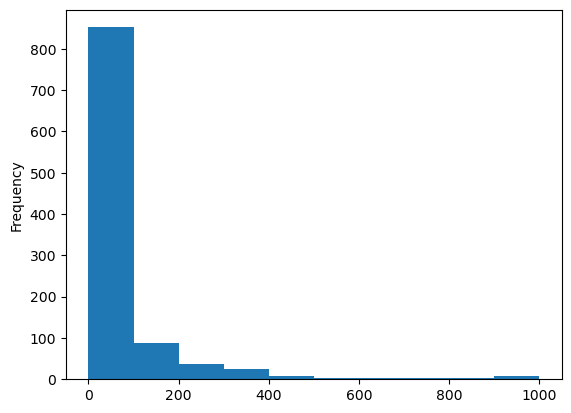

count    1027.000000
mean       69.753749
std       129.221230
min         0.100000
25%         8.800000
50%        28.500000
75%        69.100000
max       999.900000
Name: weight_kg, dtype: float64

In [34]:
dfPokemonClean["weight_kg"].plot.hist()
plt.ylabel("Frequency")
plt.show()

dfPokemonClean["weight_kg"].describe()

In [35]:
# There are some outliers - let's see how many are more than three std's
threshold = dfPokemonClean["weight_kg"].mean() + 3 * dfPokemon["weight_kg"].std()

dfExtremeValues = dfPokemonClean[ dfPokemonClean["weight_kg"] > threshold ]
print("% of extreme values: ", 100*(dfExtremeValues.shape[0]/dfPokemonClean.shape[0]))
dfExtremeValues

% of extreme values:  2.239532619279455


,name,generation,status,type_1,type_2,height_m,weight_kg,ability_1,ability_2,hp,attack,defense,speed,catch_rate
pokedex,,,,,,,,,,,,,,
143,Snorlax,1,Normal,Normal,NaN,2.1,460.0,Immunity,Thick Fat,160,110.0,65.0,30,25.0
208,Mega Steelix,2,Normal,Steel,Ground,10.5,740.0,Sand Force,NaN,75,125.0,230.0,30,25.0
376,Metagross,3,Normal,Steel,Psychic,1.6,550.0,Clear Body,NaN,80,135.0,130.0,70,3.0
376,Mega Metagross,3,Normal,Steel,Psychic,2.5,942.9,Tough Claws,NaN,80,145.0,150.0,110,3.0
383,Groudon,3,Legendary,Ground,NaN,3.5,950.0,Drought,NaN,100,150.0,140.0,90,3.0
383,Primal Groudon,3,Legendary,Ground,Fire,5.0,999.7,Desolate Land,NaN,100,180.0,160.0,90,5.0
483,Dialga,4,Legendary,Steel,Dragon,5.4,683.0,Pressure,NaN,100,120.0,120.0,90,3.0
487,Giratina Altered Forme,4,Legendary,Ghost,Dragon,4.5,750.0,Pressure,NaN,150,100.0,120.0,90,3.0
487,Giratina Origin Forme,4,Legendary,Ghost,Dragon,6.9,650.0,Levitate,NaN,150,120.0,100.0,90,3.0


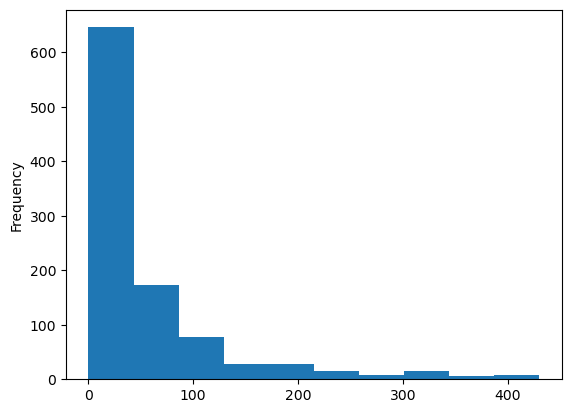

count    1004.000000
mean       54.296514
std        74.906299
min         0.100000
25%         8.500000
50%        28.000000
75%        62.000000
max       430.000000
Name: weight_kg, dtype: float64

In [36]:
# Very small, let's eliminate them to remove rare cases and replot
dfPokemonClean = dfPokemonClean[ dfPokemonClean["weight_kg"] <= threshold ]

dfPokemonClean["weight_kg"].plot.hist()
plt.ylabel("Frequency")
plt.show()

dfPokemonClean["weight_kg"].describe()

In [37]:
# Distribution is close to an Exponential and right-skewed. 

<i>Speed Analysis</i>

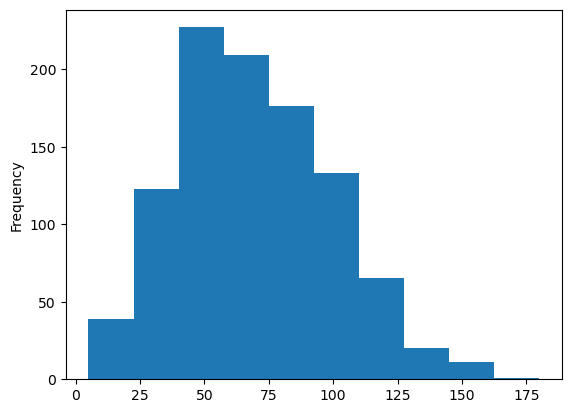

count    1004.000000
mean       68.507968
std        29.676705
min         5.000000
25%        45.000000
50%        65.000000
75%        90.000000
max       180.000000
Name: speed, dtype: float64

In [38]:
dfPokemonClean["speed"].plot.hist()
plt.ylabel("Frequency")
plt.show()

dfPokemonClean["speed"].describe()

In [39]:
# Technically there are very few (if any) extreme cases. 
# We can remove the extreme point if we wish, but that would not fundamentally change the analysis. 

# Let's do this for consistency with the other column
threshold = dfPokemonClean["speed"].mean() + 3 * dfPokemon["speed"].std()

dfExtremeValues = dfPokemonClean[ dfPokemonClean["speed"] > threshold ]
print("% of extreme values: ", 100*(dfExtremeValues.shape[0]/dfPokemonClean.shape[0]))
dfExtremeValues

% of extreme values:  0.199203187250996


,name,generation,status,type_1,type_2,height_m,weight_kg,ability_1,ability_2,hp,attack,defense,speed,catch_rate
pokedex,,,,,,,,,,,,,,
291,Ninjask,3,Normal,Bug,Flying,0.8,12.0,Speed Boost,NaN,61,90.0,45.0,160,120.0
386,Deoxys Speed Forme,3,Mythical,Psychic,NaN,1.7,60.8,Pressure,NaN,50,95.0,90.0,180,3.0


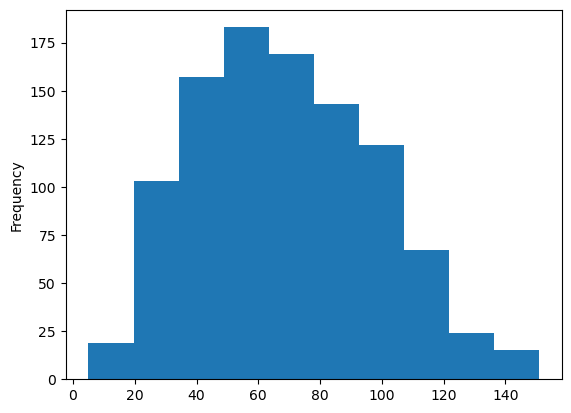

count    1002.000000
mean       68.305389
std        29.353789
min         5.000000
25%        45.000000
50%        65.000000
75%        90.000000
max       151.000000
Name: speed, dtype: float64

In [40]:
dfPokemonClean = dfPokemonClean[ dfPokemonClean["speed"] <= threshold ]

dfPokemonClean["speed"].plot.hist()
plt.ylabel("Frequency")
plt.show()

dfPokemonClean["speed"].describe()

In [41]:
# The distribution looks quite symmetric. 

# Curiosity: is this Normal?
from scipy.stats import normaltest
normaltest(dfPokemonClean["speed"])

NormaltestResult(statistic=30.560507184700434, pvalue=2.3113737820515202e-07)

In [2]:
# No... 

<i>Correlation Analysis</i>

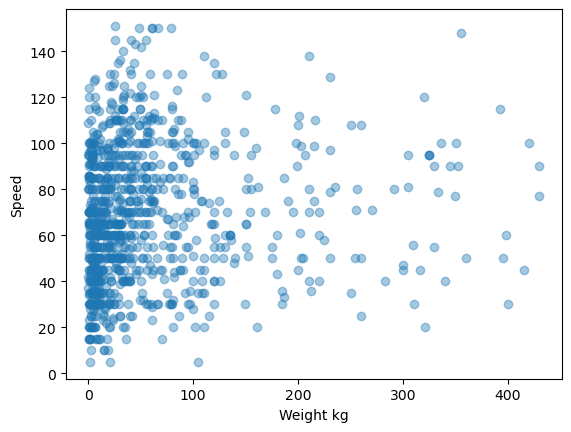

In [43]:
plt.scatter(dfPokemonClean["weight_kg"], dfPokemonClean["speed"], alpha=0.4)
plt.xlabel("Weight kg")
plt.ylabel("Speed")
plt.show()

In [44]:
# Clearly not linear and very weakly correlated.
# let's check Kendall's tau (Pearson's correlation are clearly violated.)

dfPokemonClean[["weight_kg", "speed"]].corr("kendall")

,weight_kg,speed
weight_kg,1.000000,0.138115
speed,0.138115,1.000000


There is very weakly positive correlation. Thus, the data <b>does not</b> provide enough evidence that Pokemon with a high weight are also slower.

## Question 6 

Nintendo has released a new service called <i>Pokemon Bank</i> that allows you to store Pokemon from different games and generations into a single database. Thus, it is now possible to <i>catch them all</i> and seemless use them in different games.

On that note, catching a Pokemon depends on the catch rate, which is a number between 3 and 255 that impacts the likelihood that a Pokemon will be caught after defeating it on a fight. Assume for this question that the probability of catching a Pokemon depends <b>solely</b> on this number (and not on other factors, such as the type of Poke Ball). 

Moreover, assume also that the probability of catching a Pokemon is linearly proportional to this number, with catch_rate=3 having a probability of 1% and catch_rate=255 having a probability of 100%. For example, when defeating a Pokemon with catch_rate=255, we have 100% chance of catching it.

Estimate the time it would take to <i>catch'em all</i>, that is, to catch all pokemon. Justify any additional assumptions that you make in your calculations. [2 pts]

We first start by cleaning the catch rate column, which we know from Q1 has some empty fields. In this question, I will calculate an estimate that aims at giving a <i>minimum time</i> to catch them all (i.e., it is a lower bound on the real time). Thus, we can fill the catch rate with an optimistic value for the missing fields, which is 255 (the largest possible).

In [45]:
dfPokemonClean = dfPokemon.fillna({"catch_rate":255})
dfPokemonClean["catch_rate"].isnull().sum()

0

We now calculate the probabilities based on the question statement. It is the line between 3-->1% and 255-->100%, that is, between the points (x1,y1) = (3,0.01) and (x2,y2) = (255,1), given by:

y = y1 + (y2-y1)/(x2-x1) * (x - x1)

In [46]:
# Line
dfPokemonClean["probability"] = 0.01 + (1-0.01)/(255-3)*(dfPokemonClean["catch_rate"] - 3)

# We check the distribution to see if 'min' and 'max' are correct
dfPokemonClean["probability"].describe()

count    1028.000000
mean        0.428565
std         0.339578
min         0.010000
25%         0.175000
50%         0.292857
75%         0.744643
max         1.000000
Name: probability, dtype: float64

The next question is: how many tries it takes to take a Pokemon given its probability?

For our estimates, let's use the <b>expected number</b> of tries to pick each Pokemon, that is, how many times on average we need to battle a Pokemon to get it. The expectation is reasonable because some Pokemons we may take <i>more</i> tries than their expectation, while for other Pokemon we may end up with <i>less</i> tries, so on average we hope not to be too far from that number. 

To calculate this expectation, this is similar to the coin-flipping problem: how many coin flips we need to perform to get tails? This is a <b>geometric</b> distribution, with expectation given by <b>1/p</b> (where p is the probability).

In [47]:
# Calculate expected number of tries
dfPokemonClean["tries"] = 1/dfPokemonClean["probability"]

# We check the distribution
dfPokemonClean["tries"].describe()

count    1028.000000
mean       11.459754
std        26.447292
min         1.000000
25%         1.342926
50%         3.414634
75%         5.714286
max       100.000000
Name: tries, dtype: float64

Finally, how much time per try? Using some statistics from Pokemon Sword and Shield (e.g., from YouTube), it typically takes 30s to one minute for a more experienced player to win a battle. We will use three minutes, since we should also consider the time to find Pokemons in the world, the time to talk to trainers, and other aspects (notice that three minutes per Pokemon would still be quite optimistic).

In [48]:
totaltime = dfPokemonClean["tries"].sum() * 3
totaltime

35341.880743297676

In [49]:
# Calculate time in days
(totaltime/60)/24

24.54297273840116

It would take at least 25 days (non-stop) to catch all Pokemon!